### Feature Extraction With Eigen Face

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import cv2







from sklearn.decomposition import PCA

import pickle

In [3]:
data = pickle.load(open('data/data_images_100_100.pickle', mode='rb'))

In [4]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_9991,pixel_9992,pixel_9993,pixel_9994,pixel_9995,pixel_9996,pixel_9997,pixel_9998,pixel_9999,gender
0,0.784314,0.741176,0.737255,0.709804,0.721569,0.725490,0.701961,0.690196,0.741176,0.705882,...,0.415686,0.423529,0.435294,0.443137,0.450980,0.470588,0.458824,0.462745,0.478431,female
1,0.917647,0.925490,0.921569,0.945098,0.776471,0.729412,0.447059,0.062745,0.176471,0.137255,...,0.070588,0.070588,0.066667,0.082353,0.113725,0.090196,0.121569,0.156863,0.149020,female
2,0.192157,0.192157,0.137255,0.133333,0.164706,0.156863,0.137255,0.152941,0.278431,0.243137,...,0.901961,0.905882,0.929412,0.933333,0.901961,0.862745,0.831373,0.823529,0.815686,female
3,0.537255,0.501961,0.447059,0.376471,0.376471,0.372549,0.364706,0.447059,0.588235,0.639216,...,0.207843,0.266667,0.262745,0.290196,0.360784,0.380392,0.403922,0.400000,0.376471,female
4,0.917647,0.925490,0.905882,0.905882,0.905882,0.725490,0.556863,0.435294,0.203922,0.176471,...,0.941176,0.925490,0.929412,0.937255,0.929412,0.929412,0.949020,0.945098,0.945098,female


#### Eigen Face

In [5]:
# Mean Face
X = data.drop('gender', axis=1).values

In [7]:
X

array([[0.78431373, 0.74117647, 0.7372549 , ..., 0.45882353, 0.4627451 ,
        0.47843137],
       [0.91764706, 0.9254902 , 0.92156863, ..., 0.12156863, 0.15686275,
        0.14901961],
       [0.19215686, 0.19215686, 0.1372549 , ..., 0.83137255, 0.82352941,
        0.81568627],
       ...,
       [0.69411765, 0.70196078, 0.70588235, ..., 0.61960784, 0.65098039,
        0.6745098 ],
       [0.14509804, 0.14509804, 0.14509804, ..., 0.27843137, 0.28235294,
        0.27843137],
       [0.71372549, 0.71764706, 0.72156863, ..., 0.74509804, 0.74509804,
        0.74509804]])

In [6]:
mean_face = X.mean(axis=0) #flatten mean face
mean_face.shape

(10000,)

In [7]:
mean_face

array([0.37322152, 0.37061864, 0.36680325, ..., 0.37933939, 0.37898544,
       0.38074883])

In [13]:
blok = mean_face.reshape(100,100)

In [14]:
blok

array([[0.37322152, 0.37061864, 0.36680325, ..., 0.36409509, 0.36709821,
        0.36998698],
       [0.37163511, 0.36800486, 0.36410962, ..., 0.36236528, 0.36561163,
        0.36867101],
       [0.37028919, 0.36541922, 0.36340626, ..., 0.35953007, 0.36422034,
        0.36867011],
       ...,
       [0.3834098 , 0.38201215, 0.38154022, ..., 0.37782013, 0.37923411,
        0.3791007 ],
       [0.38292697, 0.38171175, 0.38031138, ..., 0.37939838, 0.37935754,
        0.37927858],
       [0.38249951, 0.38052829, 0.37992476, ..., 0.37933939, 0.37898544,
        0.38074883]])

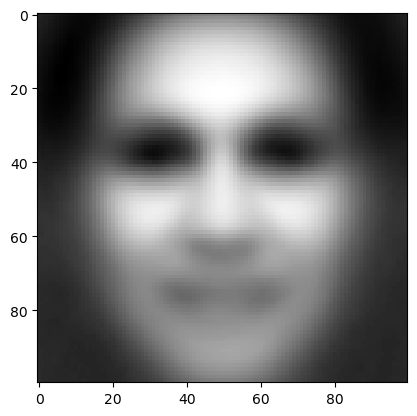

In [8]:
# visualise mean face
plt.imshow(mean_face.reshape(100,100), cmap='gray')

**Subtract data with mean face**

In [9]:
x_t = X - mean_face

In [10]:
x_t

array([[ 0.4110922 ,  0.37055783,  0.37045165, ...,  0.07948414,
         0.08375966,  0.09768254],
       [ 0.54442554,  0.55487156,  0.55476537, ..., -0.25777076,
        -0.22212269, -0.23172922],
       [-0.18106466, -0.17846178, -0.22954835, ...,  0.45203316,
         0.44454397,  0.43493745],
       ...,
       [ 0.32089613,  0.33134215,  0.3390791 , ...,  0.24026846,
         0.27199495,  0.29376098],
       [-0.22812348, -0.2255206 , -0.22170522, ..., -0.10090801,
        -0.0966325 , -0.10231746],
       [ 0.34050397,  0.34702842,  0.35476537, ...,  0.36575865,
         0.3661126 ,  0.36434921]])

**Apply x_t data to PCA**

- Find the right number of component - Elbow
- with right number of component compute principle components

In [12]:
pca = PCA(n_components=None, whiten=True, svd_solver='auto')
pca.fit(x_t)

PCA(whiten=True)

In [15]:
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components'] = np.arange(1,len(exp_var_df)+1)

exp_var_df.head()

,explained_var,cum_explained_var,principal_components
0,0.250614,0.250614,1
1,0.114036,0.364650,2
2,0.105754,0.470404,3
3,0.052003,0.522408,4
4,0.033215,0.555622,5


for my understanding

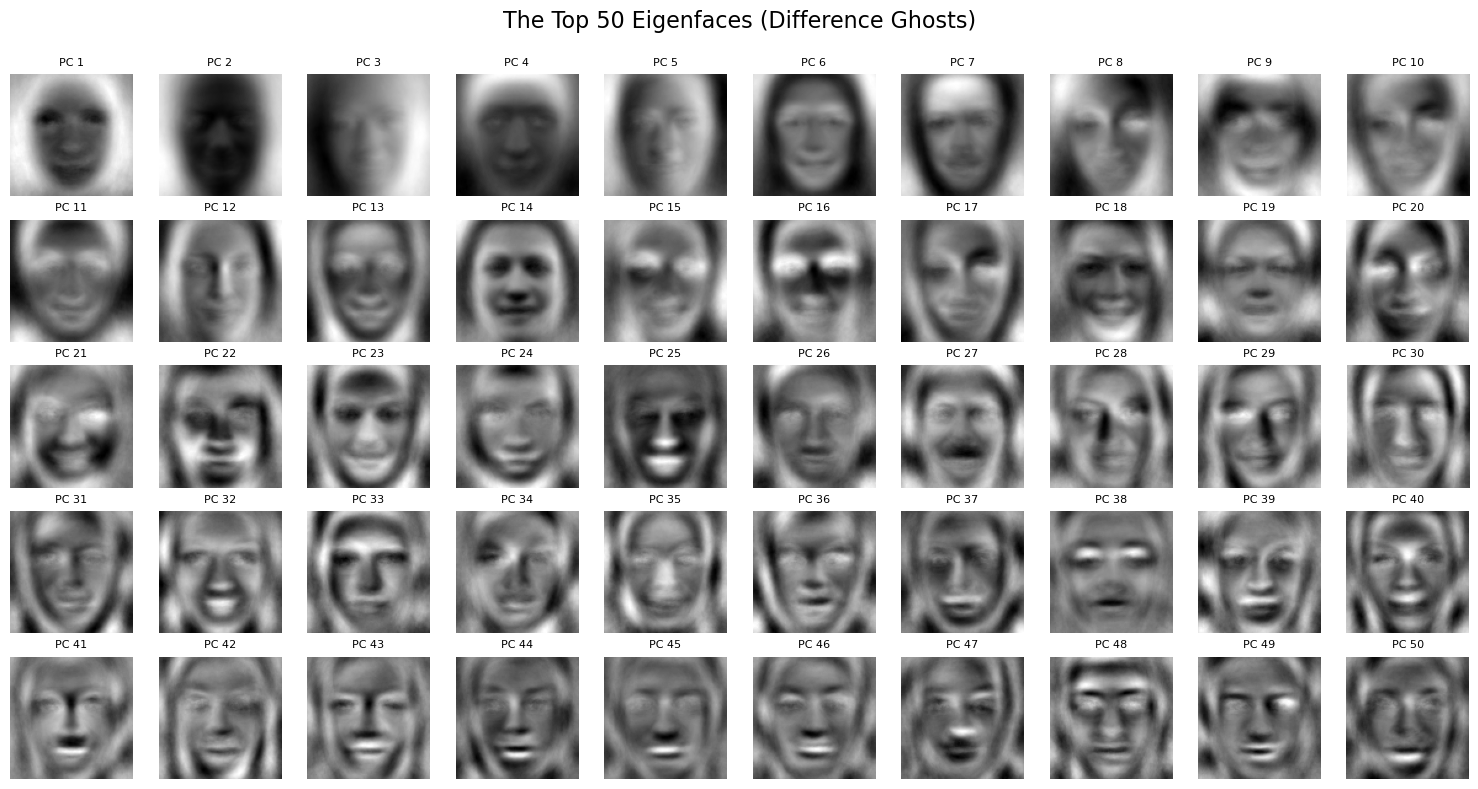

In [27]:
# YOU HAVE ALREADY CALCULATED THEM!
# In Cell 12, you ran: pca.fit(x_t)
# The "Ghosts" are stored in: pca.components_

# 1. Get the components (Eigenfaces)
# pca.components_ has shape (n_components, 10000)
# We will grab the top 50 most important ones
number_of_eigenfaces = 50
eigenfaces = pca.components_[:number_of_eigenfaces]

# 2. Visualize the "Ghosts"
import matplotlib.pyplot as plt

# Create a plot grid (5 rows x 10 columns)
fig, axes = plt.subplots(5, 10, figsize=(15, 8))
fig.suptitle('The Top 50 Eigenfaces (Difference Ghosts)', fontsize=16)

# Flatten the axes array for easy looping
axes = axes.flatten()

for i, ax in enumerate(axes):
    # CRITICAL STEP: Reshape the flat row (10000,) back to image (100, 100)
    # using your image dimensions from Cell 13
    eigen_image = eigenfaces[i].reshape(100, 100)
    
    # Plot the ghost
    ax.imshow(eigen_image, cmap='gray')
    ax.set_title(f"PC {i+1}", fontsize=8)
    ax.axis('off') # Hide X and Y axes for cleanliness

plt.tight_layout()
plt.subplots_adjust(top=0.90) # Make room for the main title
plt.show()

In [26]:
exp_var_df['cum_explained_var'].value_counts()

cum_explained_var
1.000000    72
0.998594     1
0.998561     1
0.998563     1
0.998565     1
            ..
0.989961     1
0.989974     1
0.989987     1
0.989999     1
0.995952     1
Name: count, Length: 4250, dtype: int64

In [19]:
exp_var_df.shape

(4321, 3)

In [17]:
import seaborn as sns

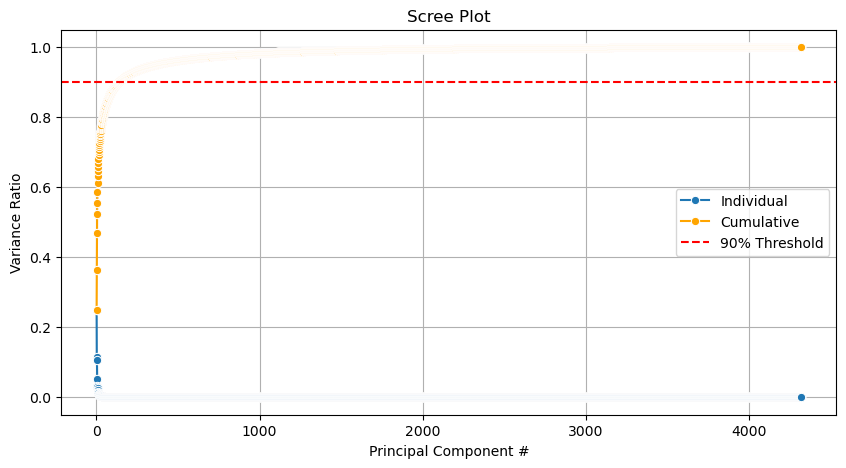

In [18]:
plt.figure(figsize=(10, 5))

# Plot the "Elbow" (Individual Variance)
sns.lineplot(data=exp_var_df, x='principal_components', y='explained_var', marker='o', label='Individual')

# Plot the "Accumulation" (Cumulative Variance)
sns.lineplot(data=exp_var_df, x='principal_components', y='cum_explained_var', marker='o', color='orange', label='Cumulative')

# Add a 90% or 95% cut-off line
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')

plt.title('Scree Plot')
plt.xlabel('Principal Component #')
plt.ylabel('Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
exp_var_df.set_index('principal_components')

,explained_var,cum_explained_var
principal_components,,
1,2.506144e-01,0.250614
2,1.140360e-01,0.364650
3,1.057540e-01,0.470404
4,5.200325e-02,0.522408
5,3.321472e-02,0.555622
...,...,...
4317,4.572155e-35,1.000000
4318,2.914411e-35,1.000000
4319,2.803020e-35,1.000000


<Axes: title={'center': 'With Cummulative Explained Variance'}>

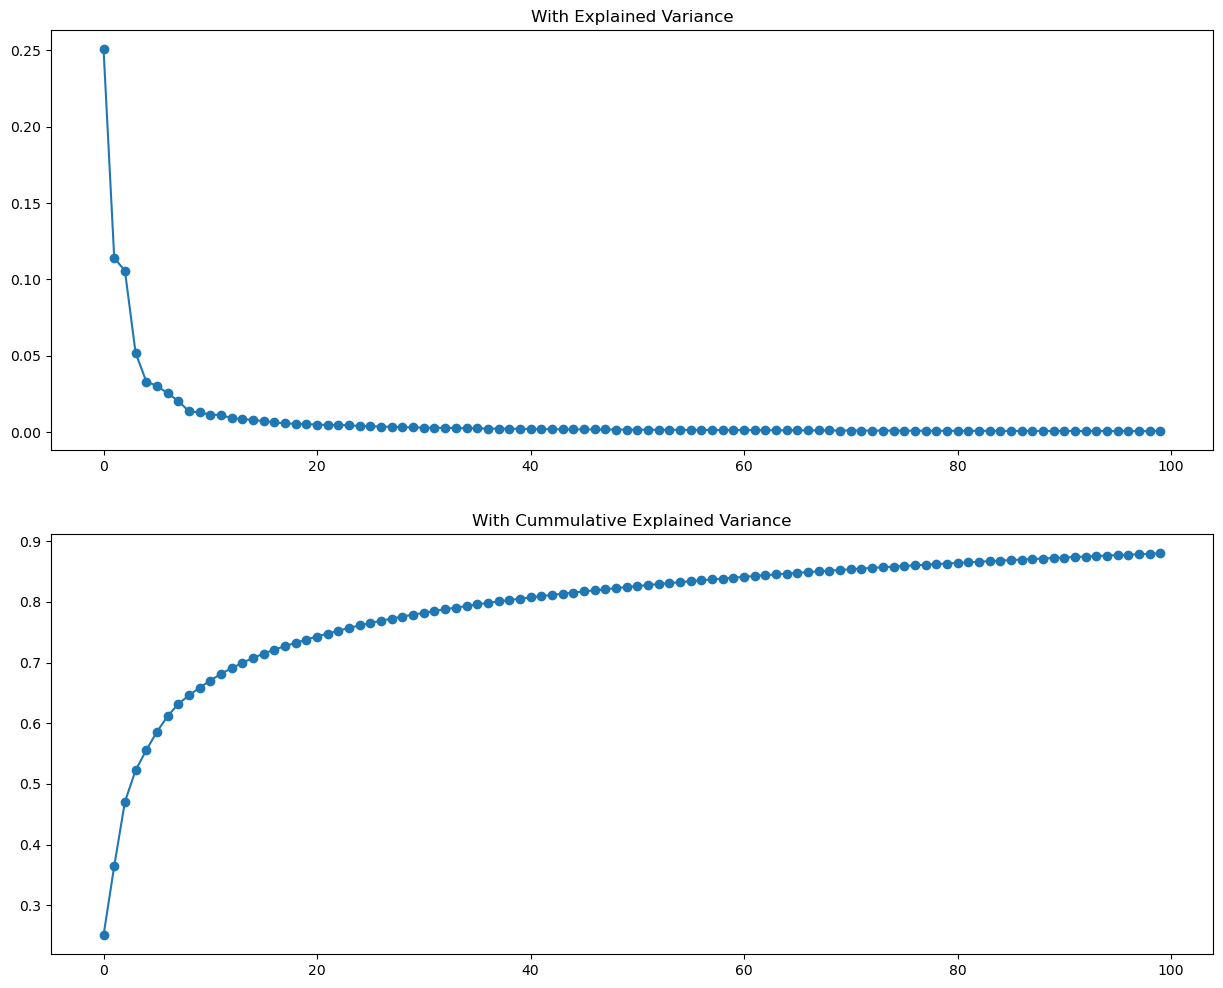

In [34]:
fig, ax = plt.subplots(nrows=2, figsize=(15,12))

exp_var_df['explained_var'].head(100).plot(kind='line', title = 'With Explained Variance', marker='o', ax=ax[0])
exp_var_df['cum_explained_var'].head(100).plot(kind='line', title = 'With Cummulative Explained Variance',marker='o',ax=ax[1])

**From above plot, it is clear taht with approximate ***50 principle components having 80%*** converge**

In [36]:
pca_50 = PCA(n_components=50, whiten = True, svd_solver='auto')
pca_data = pca_50.fit_transform(x_t)

In [37]:
pca_data.shape

(4321, 50)

In [39]:
# saving data & models

y = data['gender'].values

np.savez('./data/data_pca_50_target', pca_data, y)

In [40]:
# saving the model

pca_dict = {'pca':pca_50, 'mean_face':mean_face}

In [41]:
pickle.dump(pca_dict, open('model/pca_dict.pickle', 'wb'))

# **Visualize Eigen Image**

In [43]:
pca_data_inv = pca_50.inverse_transform(pca_data)

In [44]:
pca_data_inv.shape

(4321, 10000)

In [45]:
eig_image = pca_data_inv[0,:].reshape((100,100))

(-0.5, 99.5, 99.5, -0.5)

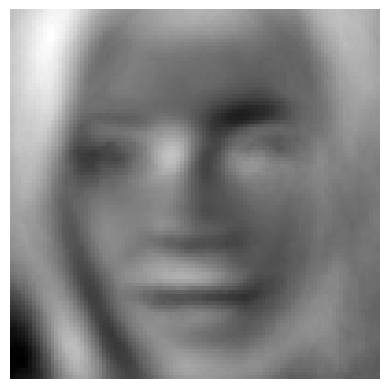

In [46]:
plt.imshow(eig_image, cmap='gray')
plt.axis('off')

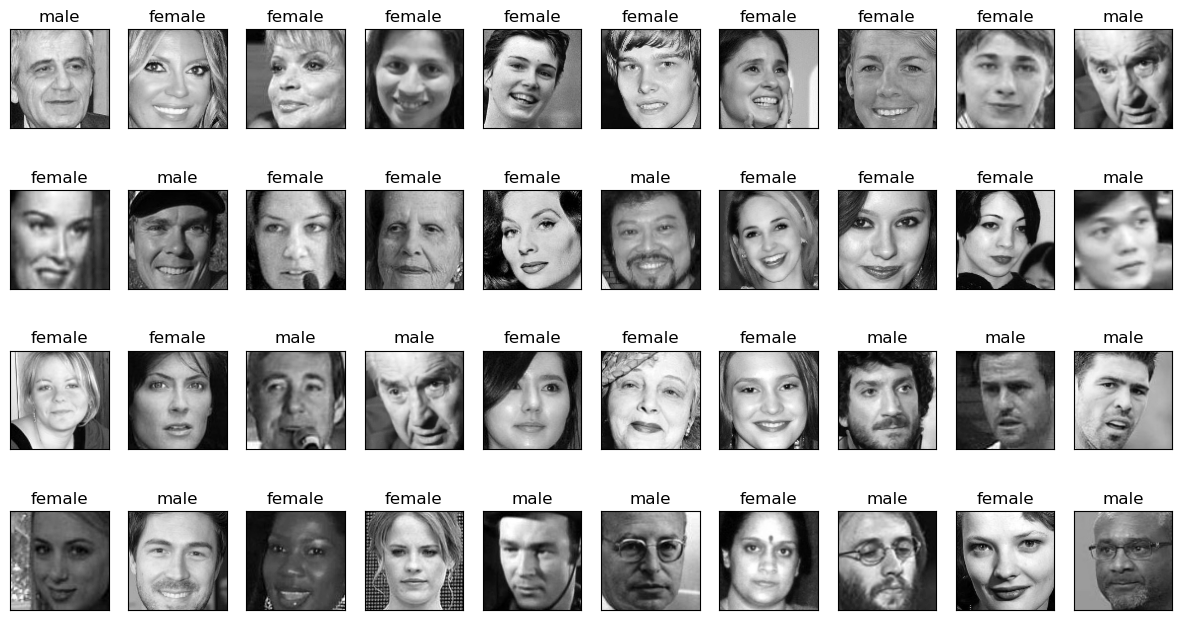

====================Eigen Images====================


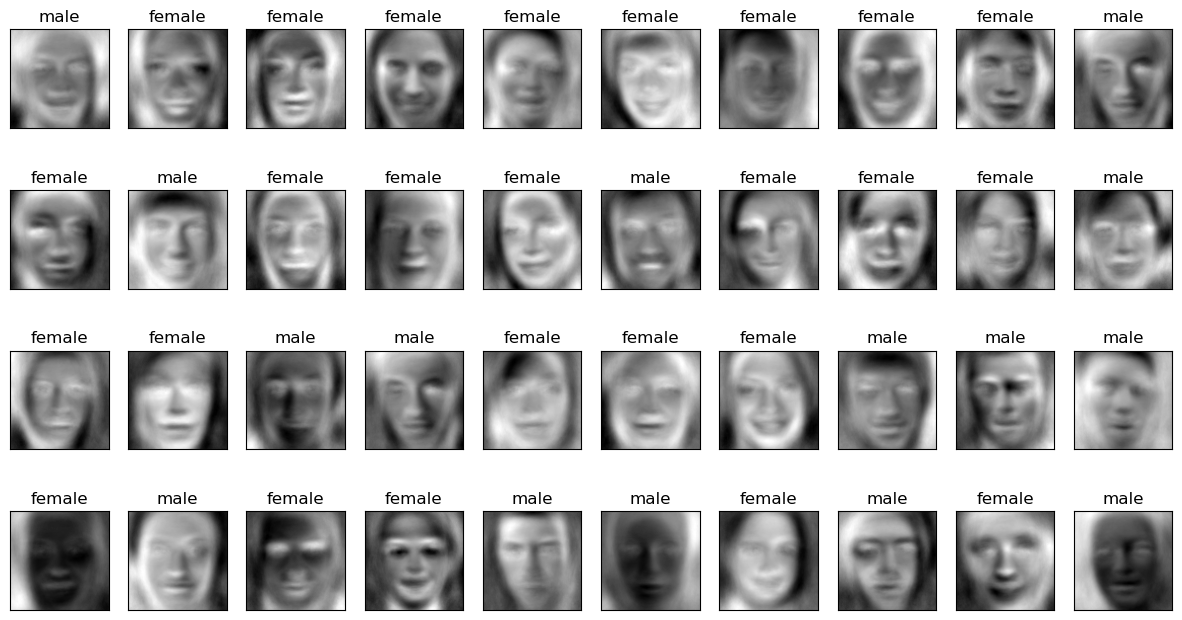

In [48]:
np.random.seed(1001)
pics = np.random.randint(0,4319,40)
plt.figure(figsize=(15,8))

for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()
